# Исследовательский анализ данных

**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных.

**Вариант №8**

Набор данных drivers2.csv

Первым делом нужно импортировать библиотеку pandas, чтобы работать с .csv файлом, а также создать датафрейм df.

In [5]:
import pandas as pd
df = pd.read_csv('drivers2.csv')

Проверяем, правильно ли читается файл с помощью .head()

In [22]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,не определена,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,64.500000,638.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0,85.200000,714.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,8.000000,787.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0,24.900000,1838.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0,36.666667,2365.0


На этом шаге переименовываем названия стобцов, убирая звездочки "*".

In [ ]:
df = df.rename(columns = {'PURPOSE*': 'PURPOSE'})
df = df.rename(columns = {'CATEGORY*': 'CATEGORY'})
df = df.rename(columns = {'MILES*': 'MILES'})
df = df.rename(columns = {'START_DATE*': 'START_DATE'})
df = df.rename(columns = {'END_DATE*': 'END_DATE'})
df = df.rename(columns = {'START*': 'START'})
df = df.rename(columns = {'STOP*': 'STOP'})

Импортируем еще две библиотеки: seaborn и matplotlib.pyplot

matplotli.pyplot - это базовая библиотека для построения графиков в Python

seaborn -  это высокоуровневая библиотека для статистической визуализации

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

**Задание 1:** Использовать seaborn. По группировке - CATEGORY и среднее кол-во 
пройденных миль по каждой цели маршрута - PURPOSE построить диаграмму 
следующего вида:

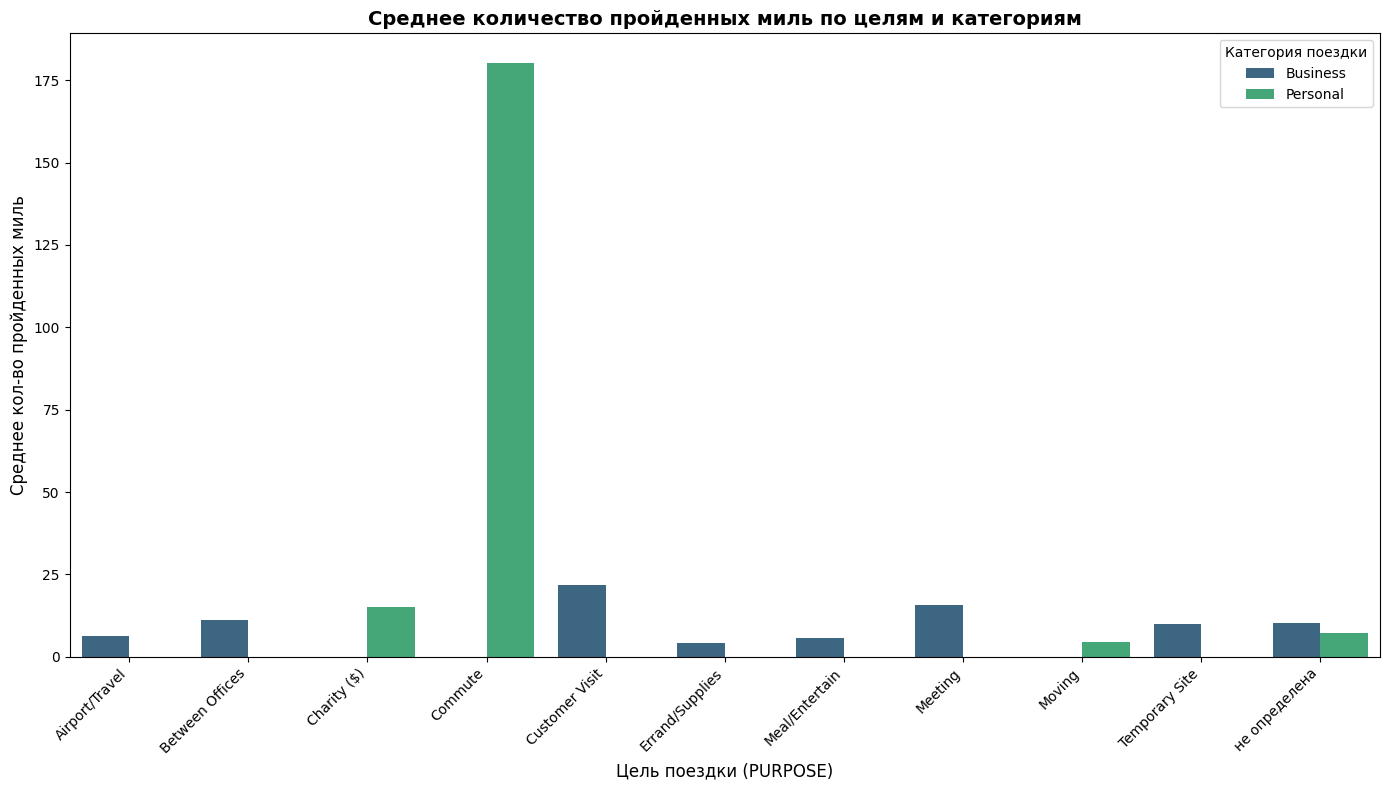

In [40]:
df['PURPOSE'] = df['PURPOSE'].fillna('не определена')

grouped_data = df.groupby(['PURPOSE', 'CATEGORY'])['MILES'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data, 
    x='PURPOSE', 
    y='MILES', 
    hue='CATEGORY',
    palette='viridis'
)

plt.title('Среднее количество пройденных миль по целям и категориям', fontsize=14, fontweight='bold')
plt.xlabel('Цель поездки (PURPOSE)', fontsize=12)
plt.ylabel('Среднее кол-во пройденных миль', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория поездки')
plt.tight_layout()

plt.show()



Анализ средней длины поездок показал, что деловые поездки значительно длиннее личных. Посещение клиентов и поездки в аэропорт - самые протяженные. Личные поездки в основном короткие, за исключением переездов и регулярных маршрутов на работу/учебу. Это показывает разную логику планирования: бизнес требует дальних поездок, личные дела решаются ближе к дому.

**Задание 2** Использовать pandas и plot. По сводной таблице (pivot_table) - 
отобразить минимальную стоимость по каждой начальной точке поездки (START). 
Отфильтровать сводную таблицу и оставить стоимость только выше 5000. 
Оставить только маркеры в виде  ●  черного цвета размером 16

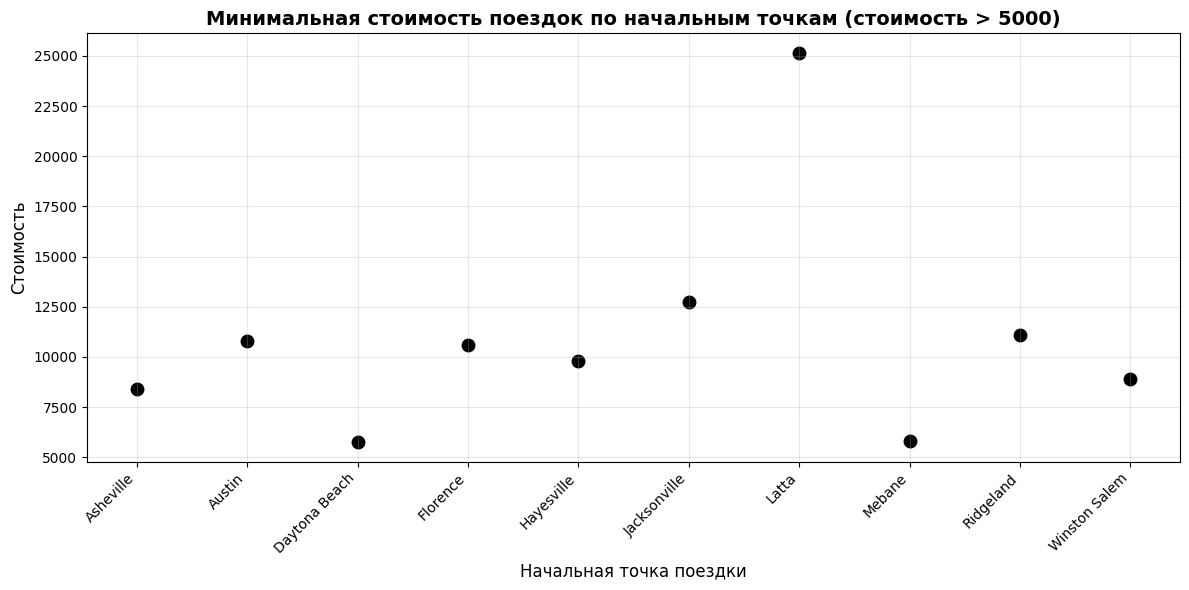

In [44]:
pivot_df = df.pivot_table(
    values='price',      
    index='START',       
    aggfunc='min'       
).reset_index()          

filtered_df = pivot_df[pivot_df['price'] > 5000]

plt.figure(figsize=(12, 6))  
plt.scatter(
    x=filtered_df['START'],   
    y=filtered_df['price'],   
    marker='o',              
    s=100,                    
    color='black',            
    linewidths=0              
)
plt.title('Минимальная стоимость поездок по начальным точкам (стоимость > 5000)', fontsize=14, fontweight='bold')
plt.xlabel('Начальная точка поездки', fontsize=12)
plt.ylabel('Cтоимость', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(True, alpha=0.3)            
plt.tight_layout()
           
plt.show()

Исследование минимальной стоимости поездок выявило несколько точек с аномально высокими ценами (выше 5000). Большинство начальных точек имеют схожие ценовые показатели, но некоторые выделяются чрезмерно высокой стоимостью. Это может указывать на удаленные локации или специализированные маршруты с особыми условиями.

**Задание 3** Использовать matplotlib. Построить круговую диаграмму, которая 
отображает процент по каждой категории поездки. 

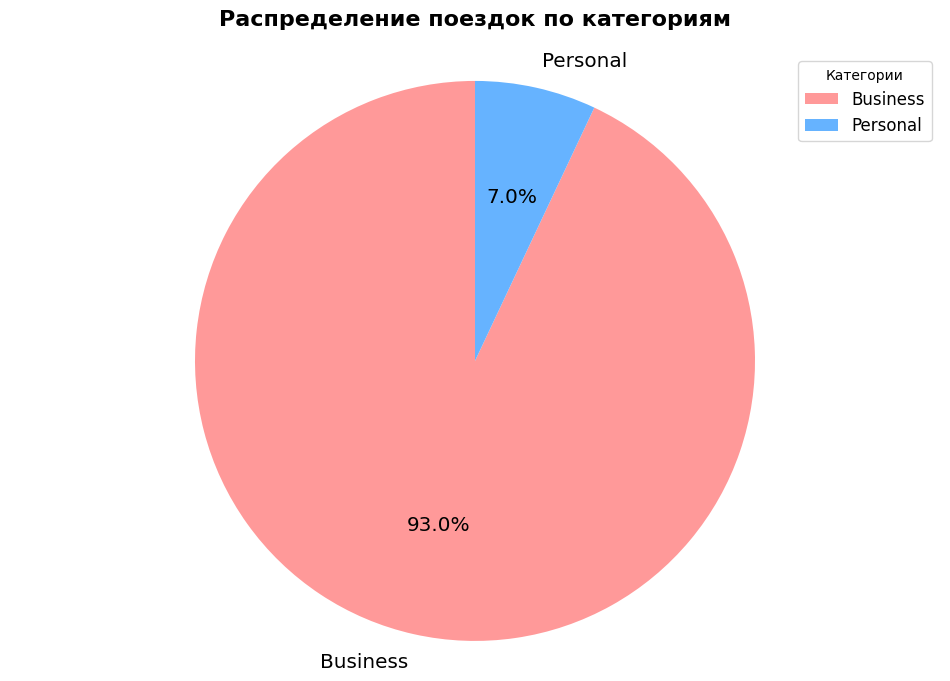

In [42]:
category_counts = df['CATEGORY'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    category_counts.values,       
    labels=category_counts.index,  
    autopct='%1.1f%%',          
    startangle=90,               
    textprops={'size': 'x-large'}, 
    colors=['#ff9999', '#66b3ff'] 
)

plt.title('Распределение поездок по категориям', fontsize=16, fontweight='bold', pad=20)
plt.legend(
    title='Категории',           
    labels=category_counts.index, 
    fontsize=12,                 
    bbox_to_anchor=(1, 1),              
)
plt.axis('equal')
plt.show()

Распределение поездок по категориям демонстрирует явное преобладание деловых поездок над личными. Соотношение составляет примерно 13:1, что показывает - транспортная система в основном обслуживает рабочие нужды. Личная мобильность занимает значительно меньшую долю в общем объеме поездок.

### Вывод

В ходе лабораторной работы был проведен анализ данных о поездках, который позволил выявить четкие закономерности в транспортном поведении. 

Исследование показало, что деловые и личные поездки существенно различаются по своей структуре. Бизнес-поездки в среднем длиннее и связаны с посещением клиентов, поездками между офисами и временными рабочими площадками. Личные поездки короче и сосредоточены вокруг бытовых задач и развлечений.

Анализ стоимости поездок выявил точки с аномально высокой минимальной ценой, что может указывать на удаленные или специализированные маршруты. При этом большинство начальных точек имеют сопоставимые ценовые показатели.

Статистика по категориям поездок демонстрирует значительное преобладание деловых поездок над личными. Это говорит о том, что транспортная система в основном обслуживает рабочие нужды.

Полученные результаты могут быть полезны для оптимизации транспортных маршрутов, планирования логистики и понимания структуры мобильности в современном городе. Все поставленные задачи работы были выполнены, цели достигнуты.